In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import random
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
#from scipy.special import erf
from lxml import etree
from os import listdir, path


Ds = {'Hidrogeno': 6.4E-5,
      'Oxigeno': 1.8E-4,
        'Alcohol': 1.0E-4,
        'Benceno': 8.8E-6,

        'Azucar': 3.6E-9,
        'Sal': 1.1E-9,
        'Alcohol2': 8.0E-10}

# The diffusion equation
The one-dimensional diffusion equation or Fick's second law is
$$
\frac{\partial c}{\partial t}=\frac{\partial }{\partial x}\left(D\frac{\partial c}{\partial x}\right)
$$
It can be solved for the spatially and temporally varying concentration $c(x,t)$ with sufficient inital and boundary conditions. 

However, an interesting case is that of a constant diffusion coefficient $D$
$$
\frac{\partial c}{\partial t}=D\frac{\partial^2 c}{\partial x^2}
$$
Which solution depends critically on initial and boundary conditions specific to the problem at hand.

## Elementary solution
The instantaneous, localized release of a sustance in an infinite domain initially free of the sustance.  

Matematically, we have:
- Infinite doman $-\infty < x < +\infty$,
- D = constant,
- No initial concentration, except for the localized release: $c_0(x)=M\delta (x)  \text{ at }t=0$,
- It will take the sustance an infinite time to rech the infinitely far ends of the foman, so: $\lim_{x\to +\infty}c=\lim_{x\to -\infty}c=0 \text{ at } (t<\infty)$

Here, $M$ is the total mass of the substance per unit cross-sectional area, and $\delta(x)$ is the  
Dirac function
$$
\delta(x)=
\begin{cases} 
0 & \text{if $x \neq 0$},\\
+\infty & \text{if $x = 0$}.
\end{cases}
$$
and the area under the infinitely tall and infinitely narrow peak is unity.

Which has the solution:
$$
c(x,t) = At^{-1/2}\text{exp}^{\left(- \frac{x^2}{4Dt}\right)}.
$$
That meets the boundary conditions (vanishing concentrations far away on both sides). Then, the remaining, initial condition determines the constant of integration. Conservation of the total amount of the substance requires that
$$
\int_{-\infty}^{+\infty}c(x,t) dx=\int_{-\infty}^{+\infty}c_0(x)dx=M
$$
at all times. Therefore, we get: $A=M/\sqrt{4\pi D}$.  

And the final solution is:
$$
c(x,t) = \frac{M}{\sqrt{4\pi Dt}}\text{exp}^{\left(- \frac{x^2}{4Dt}\right)}
$$

Kronecker delta

$$
\delta_{ij}=
\begin{cases} 
0 & \text{if $i \neq j$},\\
1 & \text{if $i = j$}.
\end{cases}
$$

In [41]:
def n_1d(mass, D, x, t):
    """
    M mass
    D diffusion rate
    """
    return (mass/(2*np.sqrt(np.pi * D * t))) * np.exp(pow(-x,2)/(4*D*t))

# from Cushman chp. 2
def n(x, t, D):
    return np.exp(-x * x / (4 * D * t)) / (2*np.sqrt(np.pi * D * t))

def msd_1d(D, t):
    return 2*D*t

def c_1d(mass, D, x, t):
    return (mass/np.sqrt(4*np.pi*D*t))*np.exp(-((x*x)/(4*D*t)))

def n_2d():
    pass

Ds = {'Hidrogen':0.64E-4, 'Oxigen':0.18E-4, 'Alcohopl':0.1E-4,
      'Benceno':0.08E-4, 'Sugar':0.36E-9, 'Salt':1.10E-9, 'Alcohol':0.8E-9}

In [43]:
t = 1
x = 0
c0 = 7.5E-4
n_1d(c0, Ds['Salt'], x, t), msd(Ds['Salt'],t), c_1d(c0, Ds['Salt'], x, t)

(6.37910849745947, 2.2e-09, 6.37910849745947)

In [ ]:

xs = np.linspace(-.5, .5, 10000)
escalaX = 100.
escalaY = .1

ns = n(xs, .1, Ds['Azucar'])

fig = plt.figure()
plt.axis([-.5, .5, 0, 200])

plt.plot(xs * escalaX, ns * escalaY)
plt.show(fig)

### Example 
from [Cushman 2012 ch 2](http://www.dartmouth.edu/~cushman/courses/engs43/Chapter2.pdf)

A tank aboard a barge traveling along the Chicago Ship Canal suddenly
collapses, releasing its benzene content ($C_6H_6$, density = $0.879 g/cm^3$), of which 100 liters find their way quickly to the water. The rest of the benzene remains contained on the barge.  
Assuming rapid mixing across the canal section (8.07m deep and 48.8 m wide) and estimating the turbulent diffusion coefficient at $3.0 m^2/s$, what are the concentrations of benzene 2, 6, 12 and 24 hours after the accident, at the site of the spill and 300 m away?  
  
  To solve this problem, we first determine the mass of benzene that was spilled. Since the density of benzene is 0.879 g/cm3 = 0.879 kg/L, this mass $m$ is:
$$m = \text{mass} \times \text{volume}$$

In [61]:
density = 0.879  # 0.879 g/cm^3 = 0.879 kg/L
volume = 100 # liters
D = 3

m = density * volume
print(f'm = {m} Kg')

deep = 8.07
wide = 48.8

area = deep * wide
print(f'area = {area} m^2')

m = 87.9 Kg
area = 393.816 m^2


Over the cross-section of the canal, we have

In [154]:
# Mass spilled
M = m/area
print(f'M = {M:.4f} kg/m^2')

M = 0.2232 kg/m^2


Because concentration over time is given by
$$
c(x,t) = \frac{M}{\sqrt{4\pi Dt}}\text{exp}^{\left(- \frac{x^2}{4Dt}\right)}
$$
At the site of the spill $(x=0)$ the equation becomes
$$
c(x,t) = \frac{M}{\sqrt{4\pi Dt}}
$$
which yields:

In [95]:
t = 1e-9
concentration_at_1_sec = 1/np.sqrt(4*np.pi*D*t)
print(f'c(0, t={t} sec)={concentration_at_1_sec * M: .4f} kg/m^3 or {concentration_at_1_sec * 100:.2f}% of the original Mass')

c(0, t=1e-09 sec)= 1149.5555 kg/m^3 or 515032.27% of the original Mass


Comparison of concentration close to the place of the spill at 3 instants

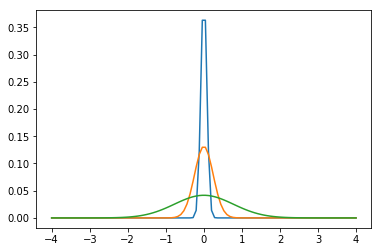

In [126]:
ts = [1e-3, 1e-2, 0.1]
xs = np.linspace(-4,4,100)
M_total = None
for t in ts:
    cs = np.exp(-np.power(xs,2)/(4*D*t))/np.sqrt(4*np.pi*D*t)
    #if M_total is None:
    M_total = cs.sum()
    plt.plot(xs,cs/M_total)


In [80]:
# concentration after 1 hour
seconds = 3600
c_at_1_hr = concentration_at_1_sec/np.sqrt(seconds)
print(f'c(0, t=1 hr)= {c_at_1_hr*M*1000:.3f} mg/L or {c_at_h:.4f}% of M')
print(f'c(0, t=1 hr)= {c_at_1_hr*M:.6f} kg/L or {c_at_h:.4f}% of M')

c(0, t=1 hr)= 0.606 mg/L or 0.0006% of M
c(0, t=1 hr)= 0.000606 kg/L or 0.0006% of M


In [159]:
# concentration at 4 instants
hours = [2, 6, 12, 24]
c_at_hs = {}
for h in hours:
    if h not in c_at_hs:
        c_at_hs[h] = c_at_1_hr/np.sqrt(h)
    print(f'c(0,t={h} hrs)={c_at_hs[h]*M*1000:.3f} mg/L or {c_at_hs[h]:.4f}% of M')

c(0,t=2 hrs)=0.428 mg/L or 0.0019% of M
c(0,t=6 hrs)=0.247 mg/L or 0.0011% of M
c(0,t=12 hrs)=0.175 mg/L or 0.0008% of M
c(0,t=24 hrs)=0.124 mg/L or 0.0006% of M


Then, 2, 6, 12, and 24 hours after the spill, at 300 mts, we have:

In [163]:
x = 300
t = 3600
# the expected time to displace X distance?
x_in_1hr = (x*x)/(4*D*t)

In [111]:
hours = [2, 6, 12, 24]
c_at_hs_at_300 = {}

for h in hours:
    if h not in c_at_hs_at_300:
        # concentration at N hours * 
        c_at_hs_at_300[h] = c_at_hs[h] * np.exp(-x_in_1hr/h)
    print(f'c(x={x},t={h} hrs)={c_at_hs_at_300[h]*M*1000:.4f} mg/L or {c_at_hs_at_300[h]:.6f}% of M')

NameError: name 'c_at_hs' is not defined

## 2D case

Now, the diffusion equation in 2D form can be written as follows,
$$
D_x\frac{\partial^2 c}{\partial x^2}+D_y\frac{\partial^2 c}{\partial y^2}=\frac{\partial^2 c}{\partial t}
$$

The solution of the diffusion equation will give us the spatial and temporal distribution concentration in the unbounded domain.

For the unbounded domain, the initial and boundary condition are,

### Initial Conditions
$$
C(x=0, y=0, t=0) = M\delta(x,y)
$$

Where $\delta$ is the Kronecker delta. 
$$
\delta(x, y) = \begin{cases}
0 & \text{for $x, $y} \neq \text{0 and}\\
1 & \text{for $x, $y = 0}.
\end{cases}
$$

### Boundary conditions
$$
\begin{align}
\text{When } x\to \pm \infty && \frac{\partial c}{\partial x}, c \to 0 \\
\text{When } y\to \pm \infty && \frac{\partial c}{\partial y}, c \to 0
\end{align}
$$

Which can be solved by using separation of variables. Considering that
$$
C(x, y, t) = C_1 (x, t)C_2(y, t)
$$

Since $C_1 \neq 0$ and $C_2 \neq 0$. Thus,
$$
\frac{\partial c_1}{\partial t}-D_x\frac{\partial^2 c_1}{\partial x^2}=0 \\
\frac{\partial c_2}{\partial t}-D_y\frac{\partial^2 c_2}{\partial y^2}=0
$$
Their solutions are
$$
c_1(x,t) = \frac{a}{\sqrt{4\pi D_xt}}\text{exp}^{-\left(- \frac{x^2}{4D_xt}\right)} \\
c_2(y,t) = \frac{\beta}{\sqrt{4\pi D_yt}}\text{exp}^{-\left(- \frac{x^2}{4D_xt}\right)}
$$

Thus,
$$
c(x, y, t) = \left(\frac{M}{4\pi t \sqrt{D_xD_y}}\right)\text{exp}^{-\left(\frac{x^2}{4D_xt} + \frac{y^2}{4D_yt}\right)}
$$
$$
c(x, y, t) = \left(\frac{M}{4\pi t \sqrt{D_xD_y}}\right)\text{exp}^{-\frac{1}{4t}\left(\frac{x^2}{D_x} + \frac{y^2}{D_y}\right)}
$$

This is the solution of the two dimensional diffusion equation for the case of instantaneous loading at x = 0, y = 0 and at t = 0.

## EVs

When water is the ambient fluid, concentration is often expressed in moles of the substance per liter ($ 1\text{L} = 10^{-3} m^3$) of solution. One mole comprises 6.02 × 1023 atoms or molecules of that substance.  
The advantage of using molarity is the ease of translation from chemical reactions at the molecular level to mass budgets at the macroscopic scale: one molecule simply becomes one mole.  
To convert moles into grams, one multiplies by the molecular weight of the substance. Example: The mass of 1 mole of ammonia (NH3) is 14+3×1 = 17 g. ([Cushman 2012 p.9](http://www.dartmouth.edu/~cushman/courses/engs43/Chapter1.pdf))

### Analytical concentration
A

at t=1e-06 cs.sum()=100000.0 max=50000.00000007461
at t=0.01 cs.sum()=100000.0 max=12983.17967716696
at t=0.1 cs.sum()=100000.0 max=4156.219683450025


[-4, 4, 0, 10000]

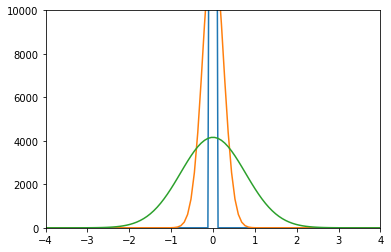

In [152]:
M = 100e3
ts = [1e-6, 1e-2, 0.1]
xs = np.linspace(-4,4,100)
M_total = None
for t in ts:
    cs = np.exp(-np.power(xs,2)/(4*D*t))/np.sqrt(4*np.pi*D*t)
    #if M_total is None:
    #c_total = cs.sum()
    plt.plot(xs,(cs/cs.sum())*M)
    print(f'at t={t} cs.sum()={cs.sum()/cs.sum()*M} max={cs.max()/cs.sum()*M}')
plt.axis([-4,4,0,10000])

In [141]:
((cs/cs.sum())*M).sum(),

(50000.00000000001,)

## Simulated data

In [3]:
def readZeroXml(p, zeroXml):
    filename = path.join(p, zeroXml)
    #print(filename)

    with open(filename,'r') as f:
        tree = etree.parse(f)

        itNo = int(tree.xpath('/states/itno')[0].text)
        

        if itNo is not 0:
            print("Error, XML file not 0.xml")
        else:
            dt = float(tree.xpath('/states/environment/dt')[0].text)            
            print("Data simulated using a timestep of", dt)
            mass_kg = 0
            for ev in tree.xpath('//xagent'):
                mass_kg += float(ev.xpath('child::mass_kg')[0].text[:-1])
            print(f"Total mass {mass_kg} kg")
    del(tree)
    return dt, mass_kg

def readIterationData(p, states_file, dt):
    pts = []
    with open(path.join(p, states_file),'r') as f:
        tree = etree.parse(f)
        itNo = int(tree.xpath('/states/itno')[0].text)
        
        time = int(itNo) * float(dt)
        minutes = time//60
        seconds = time%60
        print(f"The file {states_file} stores iteration {itNo} for a simulated time of {minutes:2.0f} min {seconds:6.2f} seconds")
        
        for ev in tree.xpath('//xagent'):
            x = float(ev.xpath('child::x')[0].text)
            y = float(ev.xpath('child::y')[0].text)
            radius_um = float(ev.xpath('child::radius_um')[0].text)
            pts.append(np.array([x, y, radius_um]))
    return np.array(pts)

In [38]:
def plot_two_states(pts0, pts, highlighted=None, equal_aspect = False):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex='col',figsize=[20,10])

    ax[0].plot(pts0[:,0], pts0[:,1], '.')
    fontprops = fm.FontProperties(size=12)

    scalebar = AnchoredSizeBar(ax[0].transData, 45, '100 um', 'lower right', 
                               pad=0.1,
                               frameon=False,
                               size_vertical=1,
                               fontproperties=fontprops)
    ax[0].add_artist(scalebar)
    if equal_aspect:
        ax[0].set_aspect('equal')

    if highlighted is not None:
        not_highlighted = [i for i in range(len(pts)) if i not in highlighted]
        ax[1].plot(pts[not_highlighted,0], pts[not_highlighted,1], '.')
        ax[1].plot(pts[highlighted,0], pts[highlighted,1], '.')
    else:
        ax[1].plot(pts[:,0], pts[:,1], '.')
    fontprops = fm.FontProperties(size=12)

    scalebar = AnchoredSizeBar(ax[1].transData, 45, '100 um', 'lower right', 
                               pad=0.1,
                               frameon=False,
                               size_vertical=1,
                               fontproperties=fontprops)
    ax[1].add_artist(scalebar)
    if equal_aspect:
        ax[1].set_aspect('equal')

## From the simulations

In [12]:
# read the experiments in this path
p = 'D:\\iterations\\v13\\unbounded\\'

experiments = [i for i in listdir(p) if path.isdir(path.join(p, i))]
[p for p in zip([i for i in range(len(experiments))], experiments)]

[(0, '1D_100k'),
 (1, '1D_100k_noPhysics'),
 (2, '1D_131k'),
 (3, '1D_25k'),
 (4, '2D_100k'),
 (5, '2D_100k_noPhysics'),
 (6, '2D_100k_randir'),
 (7, '2D_100k_randir_noPhysics'),
 (8, '2D_131k'),
 (9, '2D_25k')]

In [40]:
ex = '2D_100k_randir'

Initial states file: D:\iterations\v13\unbounded\2D_100k_randir\0_2D_source_point_randir_100000.xml
Data simulated using a timestep of 0.001983891
Total mass 4.227823665540401e-14 kg
The file 0_2D_source_point_randir_100000.xml stores iteration 0 for a simulated time of  0 min   0.00 seconds
The file 25001.xml stores iteration 25001 for a simulated time of  0 min  49.60 seconds
M = 0.00000000000000000423 kg/um^2


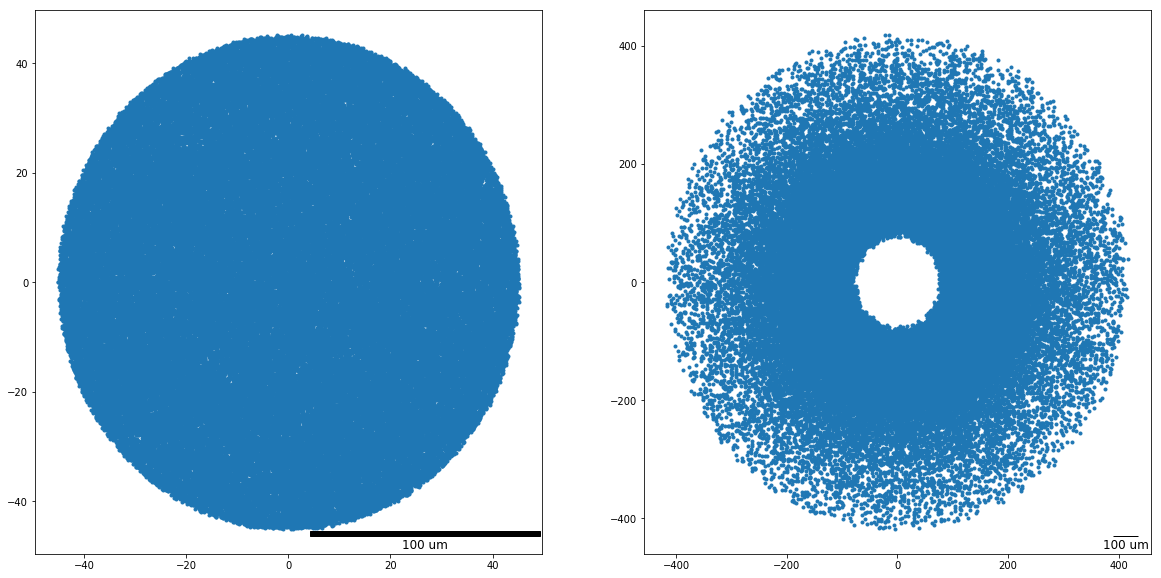

In [44]:
d = path.join(p, ex)
for f in [f for f in listdir(d) if path.isfile(path.join(d,f))]:
    if f.startswith('0'):
        print(f'Initial states file: {path.join(d,f)}')
        dt, mass_kg = readZeroXml(d,f)
        pts0 = readIterationData(d, f, dt) 
    elif f.endswith('25001.xml'):
        pts = readIterationData(d, f, dt)

# original pts
plot_two_states(pts0, pts)

M = mass_kg/(100*100)
print(f'M = {M:.20f} kg/um^2')

In [34]:
target_size_um = 0.015

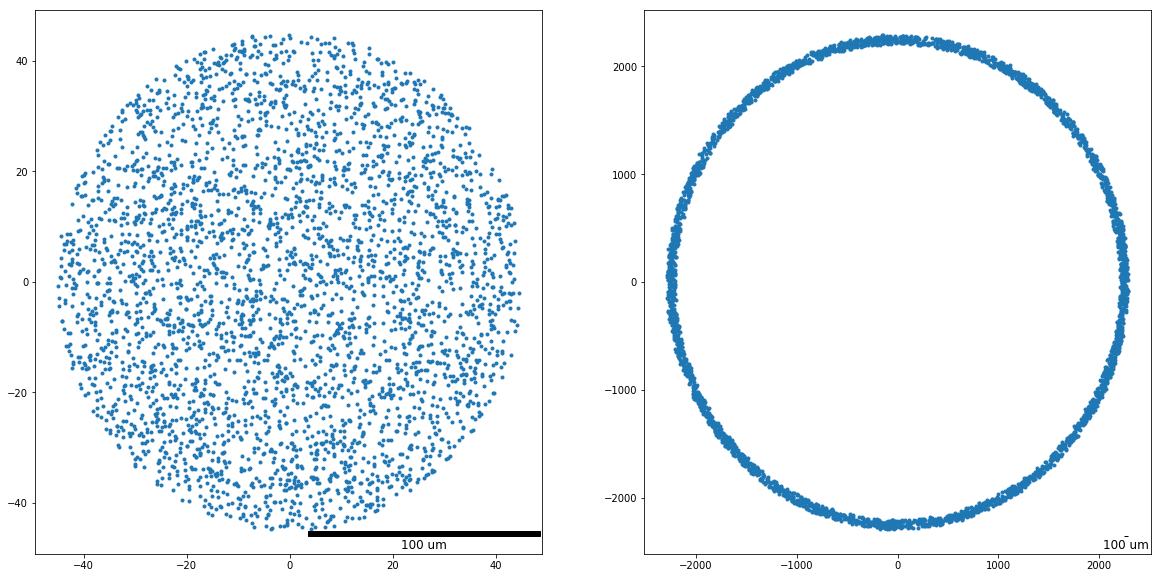

In [35]:
# identify the pts in the range of our interest
pts0_onSize = np.array([pt for pt in pts0 if pt[2] == target_size_um])
pts_onSize = np.array([pt for pt in pts if pt[2] == target_size_um])
if len(pts0_onSize) > 0 and len(pts_onSize) > 0:
    plot_two_states(pts0_onSize, pts_onSize )

In [129]:
len(pts0), len(pts_onSize), len(pts_onSize)/len(pts0)

(100000, 3526, 0.03526)

IndexError: arrays used as indices must be of integer (or boolean) type

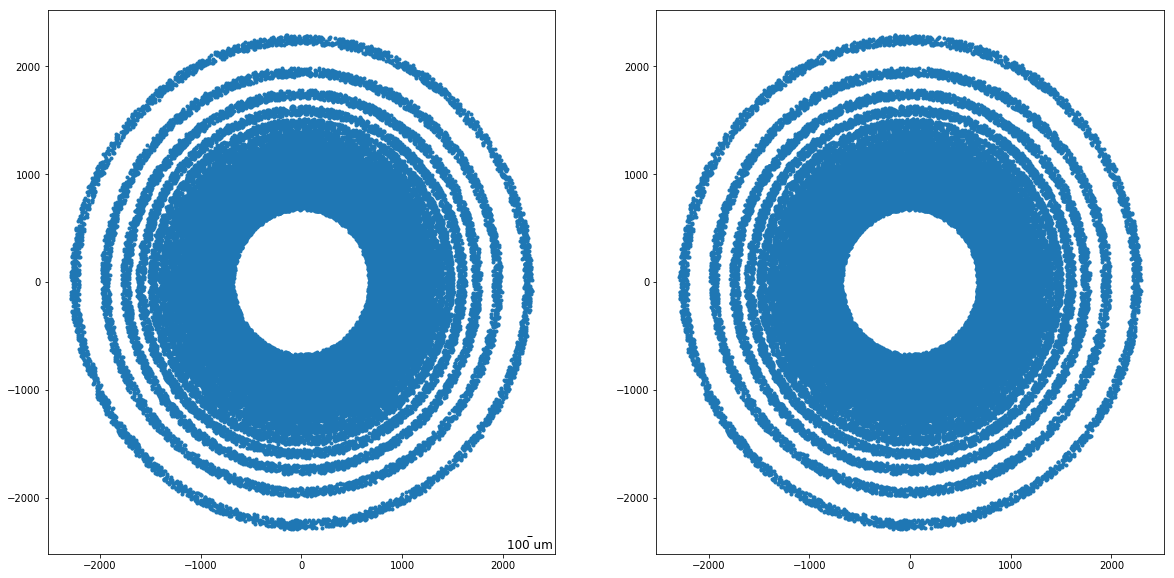

In [39]:
plot_two_states(pts, pts, pts_onSize)